In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
import os

sys.path.insert(0, '../dual_task')
current_dir = os.path.dirname(os.path.abspath('__file__'))
# Get parent directory (= the project root)
project_root = os.path.join(current_dir, '..')
# Append to system path
sys.path.append(project_root)

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import sem
from scipy.io import loadmat
# from pingouin import rm_anova, anova

import dual_data.common
from dual_data.common.plot_utils import save_fig
from dual_data.stats.bootstrap import my_boots_ci
from dual_data.licks.licks import *


In [22]:
sns.set_context("poster")
sns.set_style("ticks")
plt.rc("axes.spines", top=False, right=False)
fig_path = '../figs/perf'
golden_ratio = (5**.5 - 1) / 2
width = 6
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, width * golden_ratio ]
# matplotlib.rcParams['lines.markersize'] = 3
# sns.set(rc={'figure.figsize':(width, width * golden_ratio)})
%matplotlib inline


Licks from a given animal

In [5]:
# path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
path = '../data/behavior/DualTask-Silencing-ACC-Prl/'
# path = '../data/behavior/DualTask-Silencing-ACC/'


In [6]:
i_mouse = 2
i_session = 1
if 'DPA' in path:
    session = 'Dual' # control opto DPA or Dual
else:
    session = 'control' # control opto DPA or Dual
    
data = loadmat(path + session + '_mouse_%d/session_%d' % (i_mouse, i_session))
#data.keys()

In [7]:
licks, t_sample, t_dist, t_test, t_go, t_nogo, t_correct, t_incorrect = get_licks_and_times(data, path)

print('Times')
print('licks', licks[:5])
print('sample', t_sample[0][:5])
print('dist', t_dist[0][:5])
print('go', t_go[0][:5])
print('nogo', t_nogo[0][:5])
print('test', t_test[0][:5])
print('correct', t_correct[:5])
print('incorrect', t_incorrect[:5])
print('performance', t_correct.shape[0]/(t_correct.shape[0]+t_incorrect.shape[0]))

Times
licks [2.123 2.323 2.463 7.784 7.927]
sample [ 0.    21.023 42.049 63.071 84.093]
dist [  4.003  25.029  67.077 109.121 130.147]
go [ 25.029  67.077 109.121 235.266 319.362]
nogo [  4.003 130.147 214.244 256.291 298.335]
test [11.011 32.038 53.06  74.086 95.108]
correct [ 54.12   75.179  96.243 117.19  138.213]
incorrect [ 12.06   33.086 159.206 180.219 201.274]
performance 0.5416666666666666


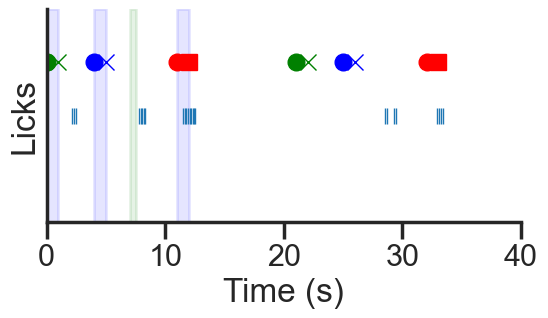

In [8]:
n_trials = 30
plt.plot(t_sample[0][:n_trials], np.ones(n_trials), 'go')
plt.plot(t_sample[1][:n_trials], np.ones(n_trials), 'gx')
plt.plot(t_dist[0][:n_trials], np.ones(n_trials), 'bo')
plt.plot(t_dist[1][:n_trials], np.ones(n_trials), 'bx')
plt.plot(t_test[0][:n_trials], np.ones(n_trials), 'ro')
plt.plot(t_test[1][:n_trials], np.ones(n_trials), 'rs')

n_licks = 100
plt.plot(licks[:n_licks], 0.95 * np.ones(n_licks), '|')
plt.ylim([0.85, 1.05])
plt.xlim([0, 40])
# 
add_vlines()

plt.xlabel('Time (s)')
plt.ylabel('Licks')
plt.yticks([])
plt.show()


licks: DPA (33, 25) Go (33, 32) NoGo (38, 24)


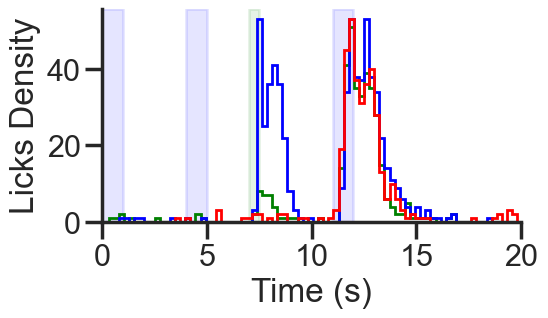

In [9]:
licks_dpa, licks_go, licks_nogo = get_licks_mouse(data, path, response='correct', trial_length=20, verbose=1)
licks_all = [ np.hstack(licks_dpa), np.hstack(licks_go), np.hstack(licks_nogo)]
licks_density, bins = plot_licks_hist(licks_all, n_bins='auto')


In [10]:
mice = np.sort(os.listdir(path))
print(mice)
mice = [mouse for mouse in mice if 'DPA' not in mouse]

print(mice)

['control_mouse_0' 'control_mouse_1' 'control_mouse_2' 'control_mouse_3'
 'control_mouse_4' 'control_mouse_5' 'control_mouse_6' 'control_mouse_7'
 'control_mouse_8' 'opto_mouse_0' 'opto_mouse_1' 'opto_mouse_2'
 'opto_mouse_3' 'opto_mouse_4' 'opto_mouse_5' 'opto_mouse_6'
 'opto_mouse_7' 'opto_mouse_8']
['control_mouse_0', 'control_mouse_1', 'control_mouse_2', 'control_mouse_3', 'control_mouse_4', 'control_mouse_5', 'control_mouse_6', 'control_mouse_7', 'control_mouse_8', 'opto_mouse_0', 'opto_mouse_1', 'opto_mouse_2', 'opto_mouse_3', 'opto_mouse_4', 'opto_mouse_5', 'opto_mouse_6', 'opto_mouse_7', 'opto_mouse_8']


In [11]:
mice_dpa, mice_go, mice_nogo = get_licks_mice(path, n_session=10, response="correct")

mouse control_mouse_0


dpa (59, 475) go (52, 690) nogo (55, 460)
mouse control_mouse_1


dpa (63, 188) go (57, 326) nogo (60, 173)
mouse control_mouse_2


dpa (61, 259) go (58, 327) nogo (61, 199)
mouse control_mouse_3


dpa (55, 195) go (57, 289) nogo (59, 204)
mouse control_mouse_4


dpa (56, 205) go (59, 312) nogo (57, 224)
mouse control_mouse_5


dpa (58, 169) go (57, 283) nogo (57, 140)
mouse control_mouse_6


dpa (50, 303) go (53, 502) nogo (57, 258)
mouse control_mouse_7


dpa (59, 168) go (58, 262) nogo (58, 154)
mouse control_mouse_8


dpa (57, 192) go (48, 333) nogo (55, 195)
mouse opto_mouse_0


dpa (54, 204) go (43, 327) nogo (51, 193)
mouse opto_mouse_1


dpa (56, 281) go (51, 431) nogo (57, 272)
mouse opto_mouse_2


dpa (52, 299) go (53, 435) nogo (52, 299)
mouse opto_mouse_3


dpa (41, 309) go (45, 305) nogo (40, 243)
mouse opto_mouse_4


dpa (43, 241) go (45, 310) nogo (44, 221)
mouse opto_mouse_5


dpa (55, 257) go (55, 309) nogo (57, 233)
mouse opto_mouse_6


dpa (51, 717) go (51, 849) nogo (57, 591)
mouse opto_mouse_7


dpa (55, 250) go (54, 316) nogo (50, 254)
mouse opto_mouse_8


dpa (55, 215) go (52, 275) nogo (52, 177)


Licks for all Mice

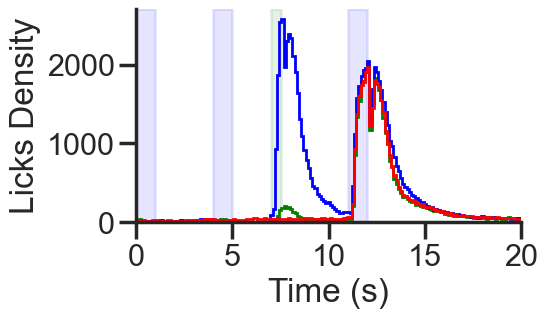

In [20]:
n_mice = 9
dpa_all = hstack_with_padding(mice_dpa[:n_mice])
go_all = hstack_with_padding(mice_go[:n_mice])
nogo_all = hstack_with_padding(mice_nogo[:n_mice])

licks_all = [ np.hstack(dpa_all), np.hstack(go_all), np.hstack(nogo_all)]

licks_density, bins = plot_licks_hist(licks_all, n_bins='auto')

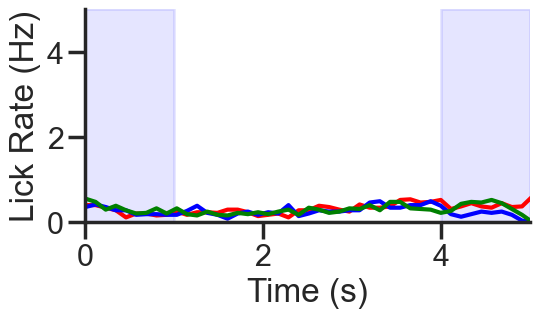

In [21]:
plot_lick_rate(licks_density, bins, n_mice)


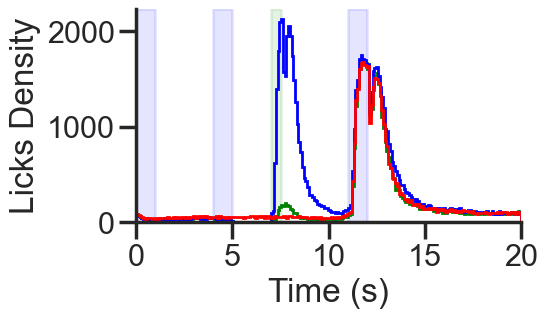

In [18]:
dpa_all = hstack_with_padding(mice_dpa[n_mice:])
go_all = hstack_with_padding(mice_go[n_mice:])
nogo_all = hstack_with_padding(mice_nogo[n_mice:])

licks_all = [np.hstack(dpa_all), np.hstack(go_all), np.hstack(nogo_all)]

licks_density, bins = plot_licks_hist(licks_all, n_bins='auto')


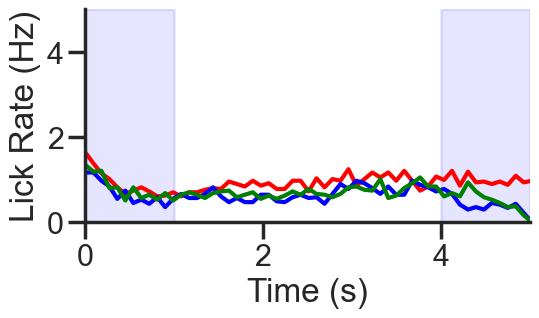

In [19]:
plot_lick_rate(licks_density, bins, n_mice=9)


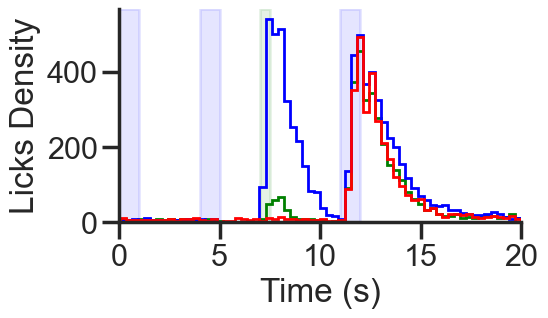

In [16]:
i_mouse = 1
licks_all = [np.hstack(mice_dpa[i_mouse]), np.hstack(mice_go[i_mouse]), np.hstack(mice_nogo[i_mouse])]
licks_density, bins = plot_licks_hist(licks_all, n_bins='auto')


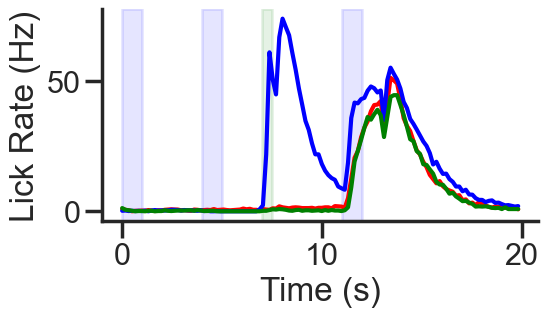

In [83]:
plot_lick_rate(licks_density, bins)


Animal Performance

In [84]:
perf = []

for i_mouse in range(10):
    
    perf_mouse = []
    
    for i_session in range(16):

        path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
        path += 'DPA_mouse_%d' % i_mouse
        path += '/session_%d.mat' % i_session
        data = loadmat(path)
    
        perf_single = np.mean(data['Data'].T[-1])

        path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
        path += 'Dual_mouse_%d' % i_mouse
        path += '/session_%d.mat' % i_session
        data = loadmat(path)
        
        perf_ODR = np.mean(data['Data1'].T[-1])
        perf_Go = np.mean(data['DataD1'].T[-1])
        perf_NoGo = np.mean(data['DataD2'].T[-1])
        
        perf_mouse.append(np.hstack((perf_single, perf_ODR, perf_Go, perf_NoGo)))
    
    perf.append(np.array(perf_mouse))
    
perf = np.array(perf)


FileNotFoundError: [Errno 2] No such file or directory: '../data/behavior/DualTask_DPA_vs_Single_DPA/DPA_mouse_8/session_0.mat'

In [94]:
mean_perf = np.mean(perf, axis=0).T
sem_perf = sem(perf, axis=0).T
print(perf.shape, sem_perf.shape)

(8, 16, 4) (4, 16)


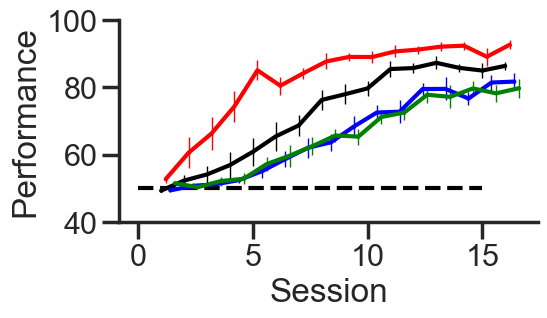

In [95]:
sessions = np.arange(1, 17, 1)

plt.errorbar(sessions, mean_perf[0], yerr=sem_perf[0], color='k', fmt='-o', ms=1, elinewidth=1)

plt.errorbar(sessions+.2, mean_perf[1], yerr=sem_perf[1], color='r', fmt='-o', ms=1, elinewidth=1)
plt.errorbar(sessions+.4, mean_perf[2], yerr=sem_perf[2], color='b', fmt='-o', ms=1, elinewidth=1)
plt.errorbar(sessions+.6, mean_perf[3], yerr=sem_perf[3], color='g', fmt='-o', ms=1, elinewidth=1)

plt.xlabel("Session")
plt.ylabel("Performance")
plt.ylim([40, 100])
plt.hlines(50, 0, 15, 'k', ls='--')
plt.show()


In [169]:
n_session = 16

path = '../data/behavior/DualTask-Silencing-Prl-ACC/'
df_Prl_ACC = get_perf_mice(path, n_session)

path = '../data/behavior/DualTask-Silencing-ACC-Prl/'
df_ACC_Prl = get_perf_mice(path, n_session)

path = '../data/behavior/DualTask-Silencing-ACC/'
df_ACC = get_perf_mice(path, n_session)

path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
df_DPA = get_perf_mice(path, n_session)

df_all = df_DPA
df_all = pd.concat((df_ACC_Prl, df_ACC, df_DPA))

# print(df_all.head())


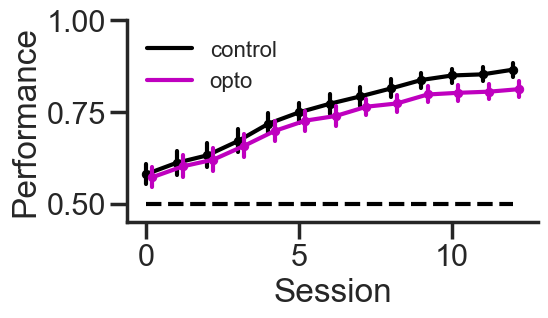

In [172]:
# df_opto = df_ACC_Prl
# df_opto = df_Prl_ACC
df_opto = pd.concat((df_ACC_Prl, df_ACC, df_Prl_ACC))

df_opto = df_opto[df_opto['session']<12.5]
# df_opto = df_opto[df_opto['opto'] != 'opto_ACC']
# df_opto = df_opto[df_opto.task=='DPA']

palette = ['k', 'm']

figname = 'performance_ctrl_opto'
fig, ax = plt.subplots() 
sns.lineplot(data=df_opto, x='session', y='perf', hue='opto', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=6)
plt.ylabel('Performance')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
plt.legend(loc='best', frameon=False, fontsize=16)
plt.hlines(.5, 0, 12, 'k', ls='--')
plt.ylim([0.45, 1])

plt.yticks([0.5, 0.75,  1])
save_fig(fig, figname, fig_path)

plt.show()


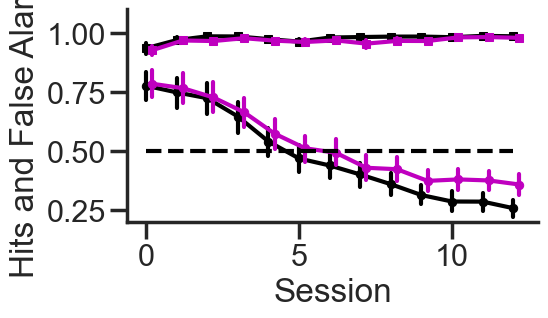

In [173]:
palette = ['k', 'm']

figname = 'fa_ctrl_opto'
fig, ax = plt.subplots()

sns.lineplot(data=df_opto, x='session', y='fa', hue='opto', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=6)
sns.lineplot(data=df_opto, x='session', y='hit', hue='opto', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=6)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=8)
plt.hlines(.5, 0, 12, 'k', ls='--')
plt.ylim([0.2, 1.1])

plt.yticks([0.25, 0.5, 0.75,  1])
save_fig(fig, figname, fig_path)

plt.show()


In [203]:
# df_all = pd.concat((df_ACC_Prl, df_ACC))

df_all = df_ACC_Prl
 
df_opto = df_all[df_all.opto=='opto']
df_opto = df_opto.drop(columns=['opto'])
df_opto = df_opto[df_opto.task!='Single_DPA']
df_opto = df_opto[df_opto.task!='ODR']

df_ctrl = df_all[df_all.opto=='control']
df_ctrl = df_ctrl.drop(columns=['opto'])
df_ctrl = df_ctrl[df_ctrl['session']<16.5]

df_DPA = pd.concat((df_ctrl[df_ctrl['task']=='DPA'], df_ctrl[df_ctrl['task']=='Single_DPA']))
df_ODR = df_ctrl[df_ctrl['task']=='ODR']

df_ctrl = df_ctrl[df_ctrl.task!='Single_DPA']
df_ctrl = df_ctrl[df_ctrl.task!='ODR']


# print(df_ctrl)
print(df_ODR.head())

         hit      miss        fa        cr     perf animal session task
0   0.984375  0.015625  0.984375  0.015625  0.50000      0       0  ODR
4   1.000000  0.000000  0.562500  0.437500  0.72000      0       1  ODR
8   1.000000  0.000000  0.078125  0.921875  0.96125      0       2  ODR
12  1.000000  0.000000  0.109375  0.890625  0.94625      0       3  ODR
16  1.000000  0.000000  0.031250  0.968750  0.98500      0       4  ODR


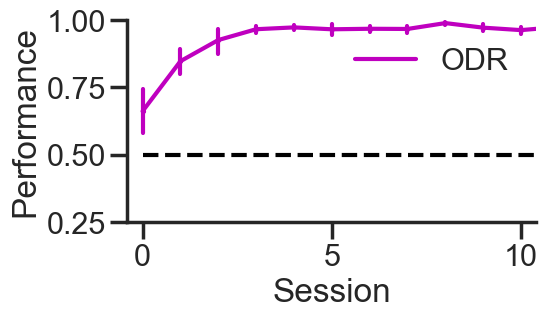

In [204]:
palette = ['m']

figname = 'performance_ODR'
fig, ax = plt.subplots() 
sns.lineplot(data=df_ODR, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Performance')
plt.xlabel('Session')
plt.xlim([-.4, 10.4])
plt.legend(loc='best', frameon=False)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.45, 1])

plt.yticks([0.25, 0.5,  0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


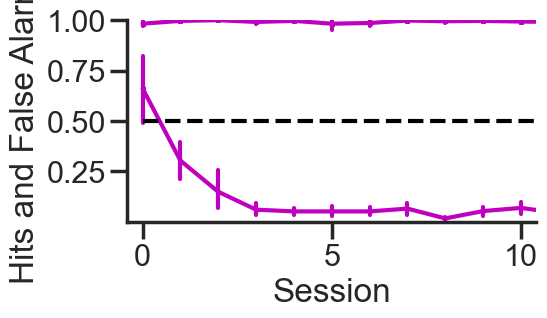

In [205]:
palette = ['m']

figname = 'hits_fa_ODR'
fig, ax = plt.subplots() 
sns.lineplot(data=df_ODR, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
sns.lineplot(data=df_ODR, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=6)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0., 1])

plt.yticks([0.25, 0.5,  0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


/tmp/ipykernel_1817184/3726551166.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=df_DPA, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)


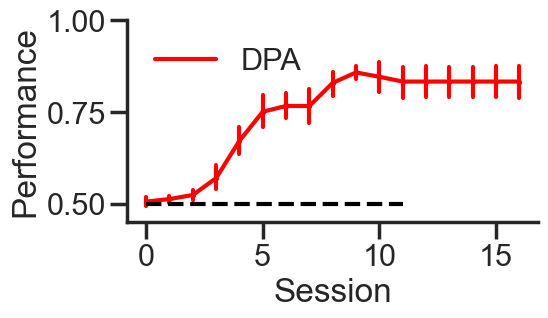

In [206]:
palette = ['r', 'b']

figname = 'performance_DPA'
fig, ax = plt.subplots() 
sns.lineplot(data=df_DPA, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Performance')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
plt.legend(loc='best', frameon=False)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.45, 1])

plt.yticks([0.5, 0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


/tmp/ipykernel_1817184/927612632.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=df_DPA, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)


/tmp/ipykernel_1817184/927612632.py:6: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=df_DPA, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)


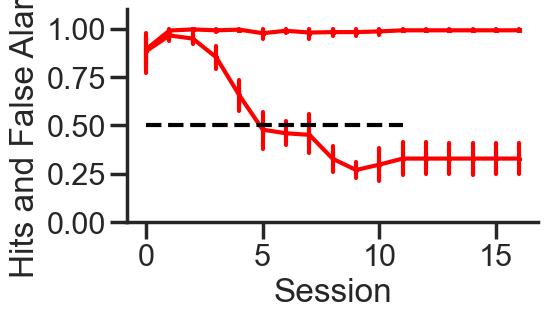

In [208]:
palette = ['r', 'b']

figname = 'hits_fa_DPA'
fig, ax = plt.subplots() 
sns.lineplot(data=df_DPA, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
sns.lineplot(data=df_DPA, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=6)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0., 1.1])

plt.yticks([0, 0.25, 0.5,  0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


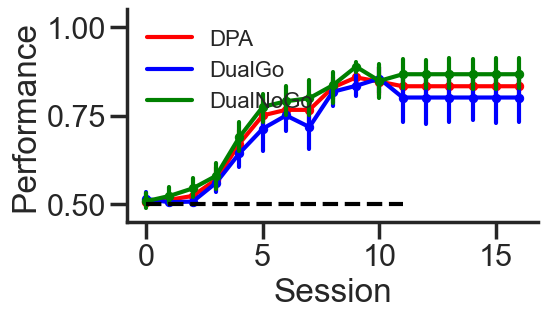

In [209]:
palette = ['r', 'b', 'g']

figname = 'performance'
fig, ax = plt.subplots() 
sns.lineplot(data=df_ctrl, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=6)
plt.ylabel('Performance')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
plt.legend(loc='upper left', frameon=False, fontsize=16)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.45, 1.05])

plt.yticks([0.5, 0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


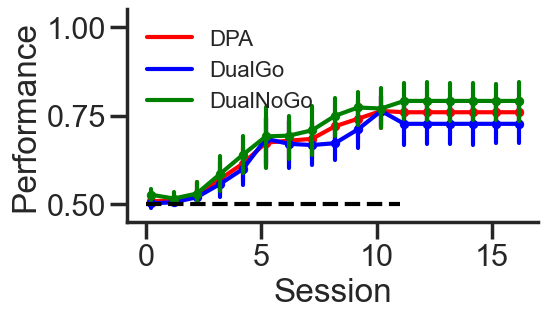

In [210]:
palette = ['r', 'b', 'g']

figname = 'performance_opto'
fig, ax = plt.subplots() 
sns.lineplot(data=df_opto, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=6)
plt.ylabel('Performance')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
plt.legend(loc='upper left', frameon=False, fontsize=16)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.45, 1.05])

plt.yticks([0.5, 0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


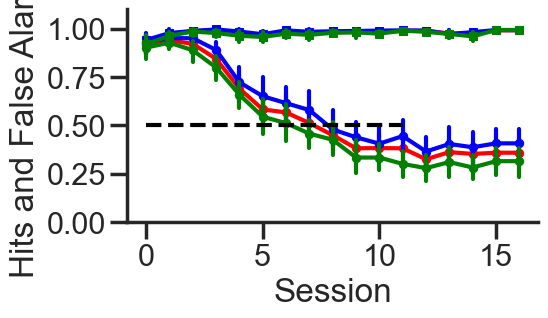

In [199]:
palette = ['r', 'b', 'g']
figname = 'false_alarms'

fig, ax = plt.subplots()
sns.lineplot(data=df_ctrl, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ms=6, ax=ax)
sns.lineplot(data=df_ctrl, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ms=6, ax=ax)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=6)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0, 1.1])
plt.yticks([0, 0.25, 0.5, 0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


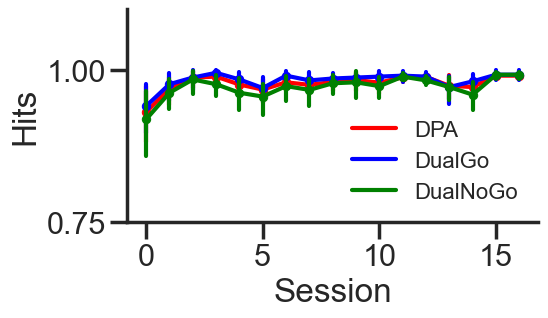

In [202]:
palette = ['r', 'b', 'g']
figname = 'hits'

sns.lineplot(data=df_ctrl, x='session', y='hit', hue='task', legend=True, errorbar='ci', err_style='bars', palette=palette, marker='o', markeredgecolor=None, ms=6)
plt.ylabel('Hits')
plt.xlabel('Session')
plt.legend(loc='best', frameon=False, fontsize=16)
plt.hlines(.5, 0, 11, 'k', ls='--')
# plt.xlim([-.4, 10.4])
plt.ylim([0.75, 1.1])
plt.yticks([0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()
